In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/seong-yeol-u/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Target'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


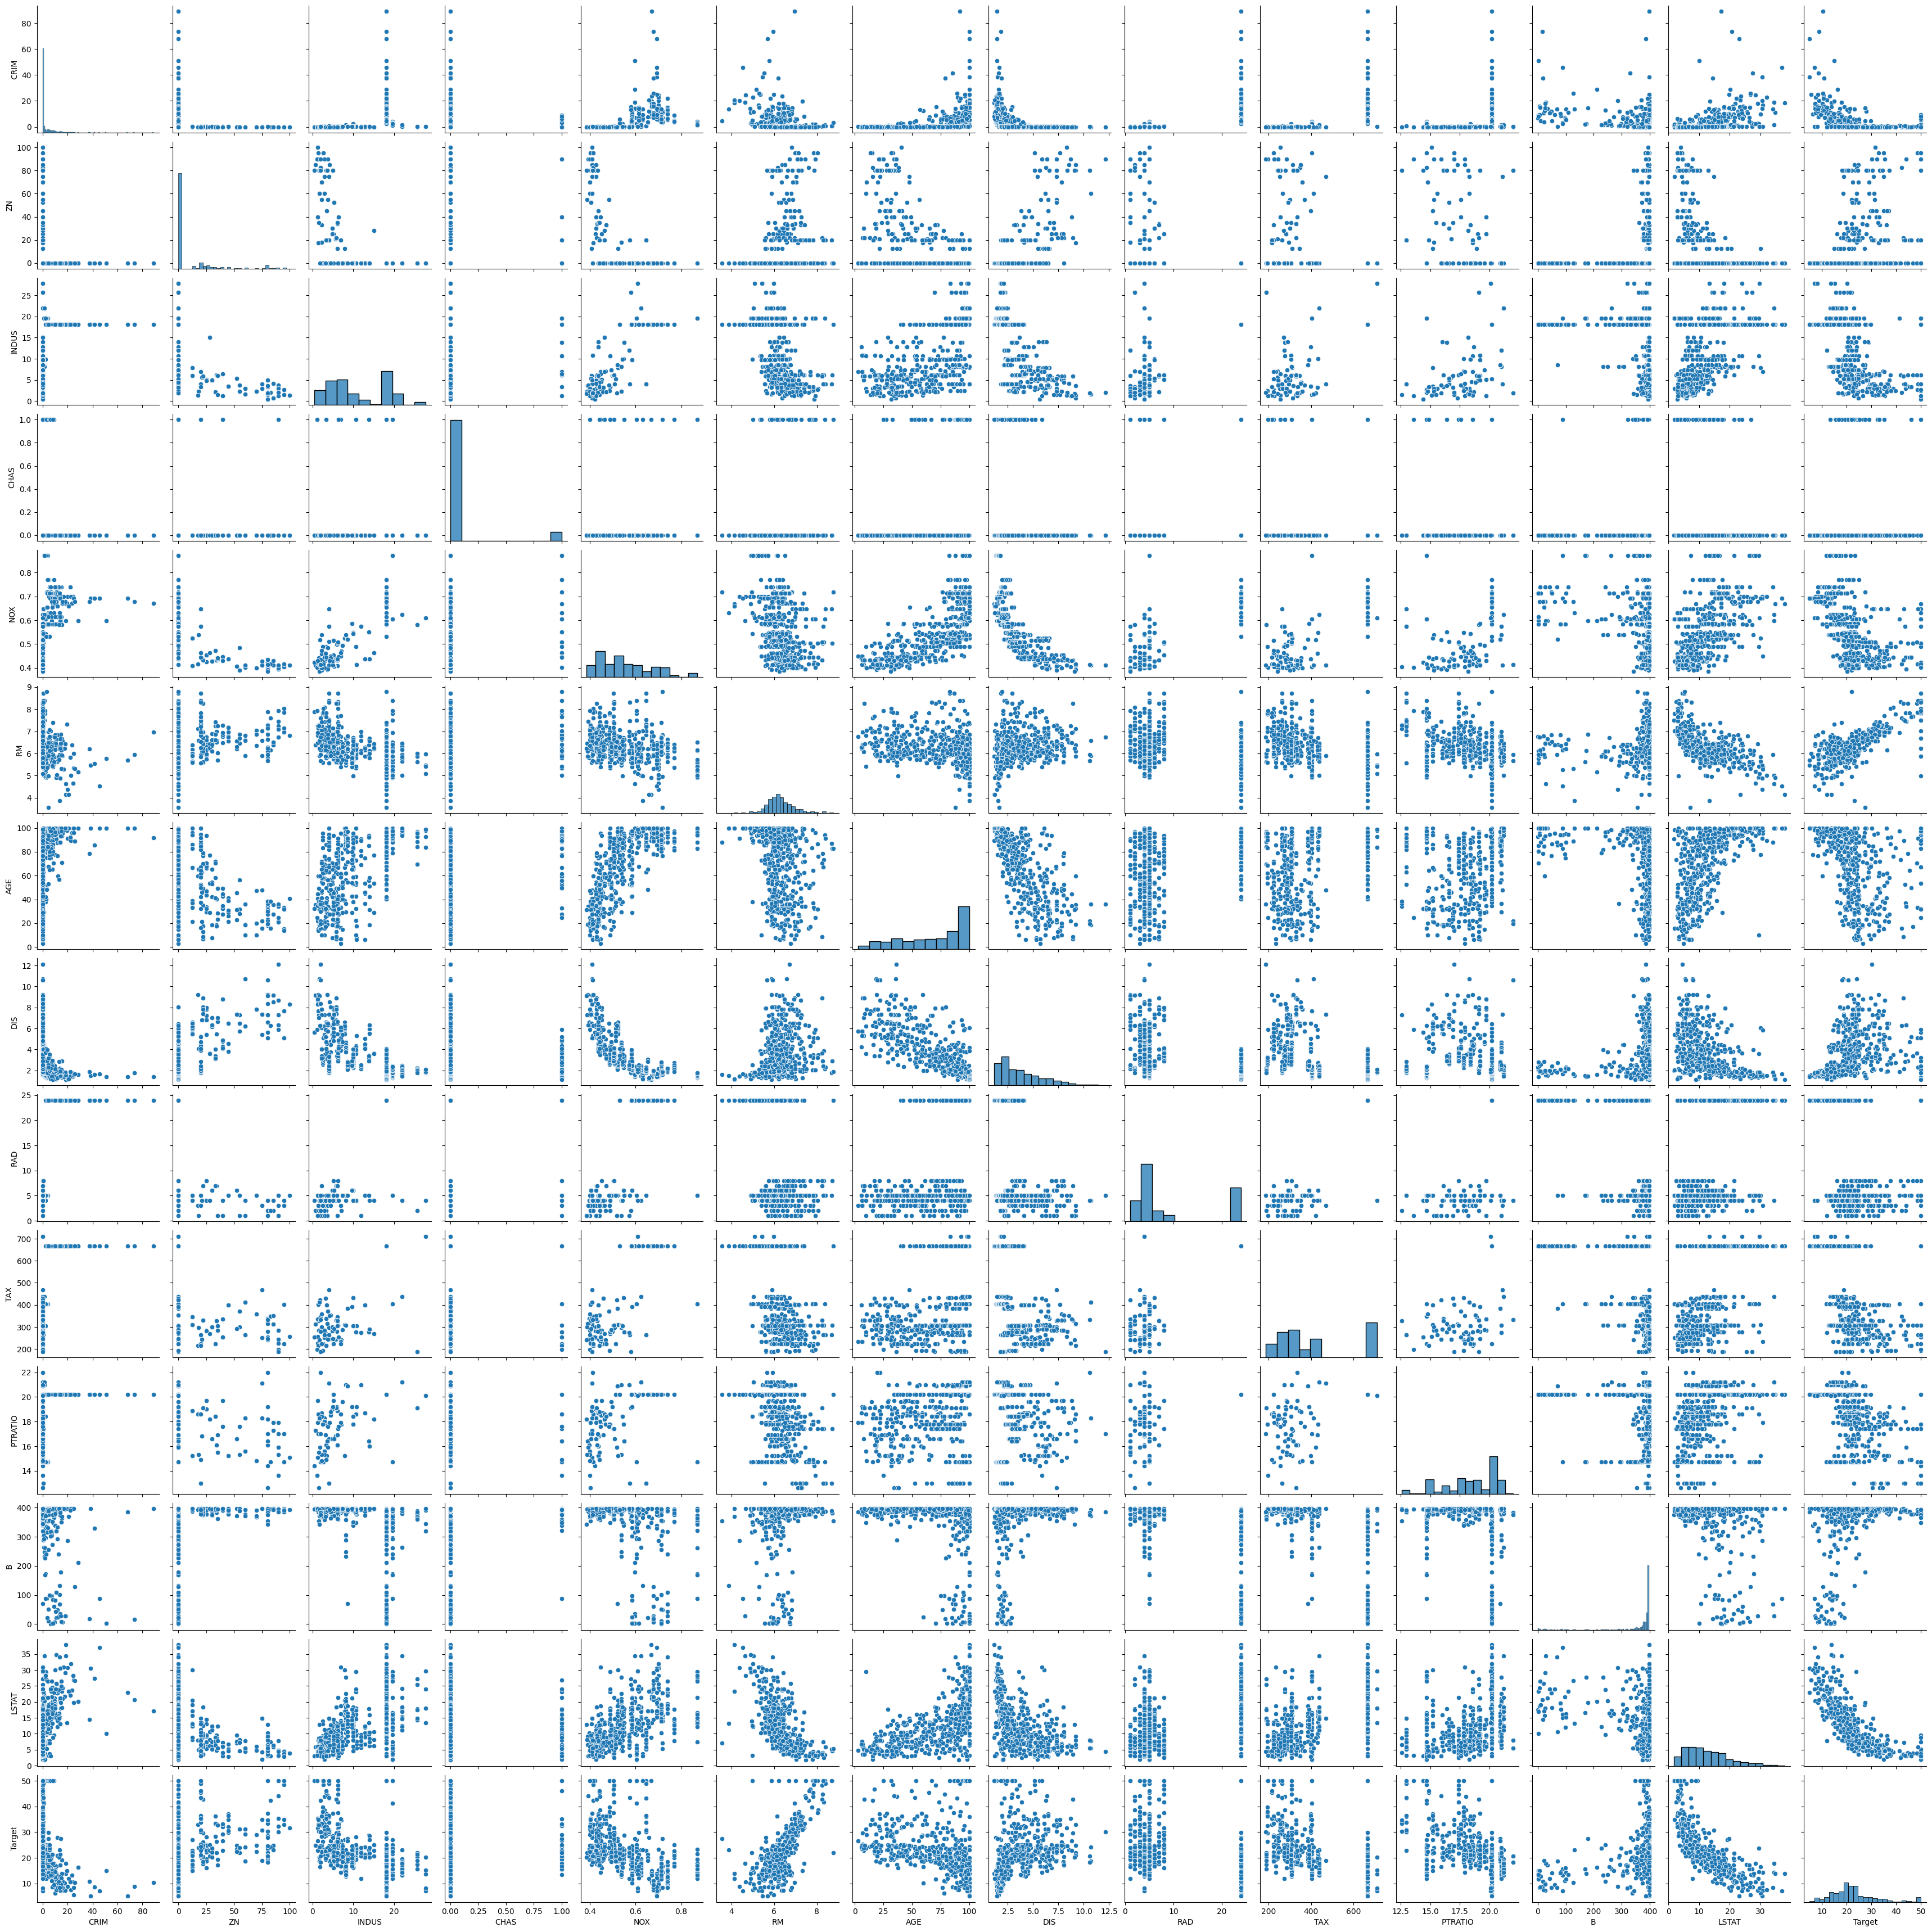

In [4]:
sns.pairplot(df)
plt.show()

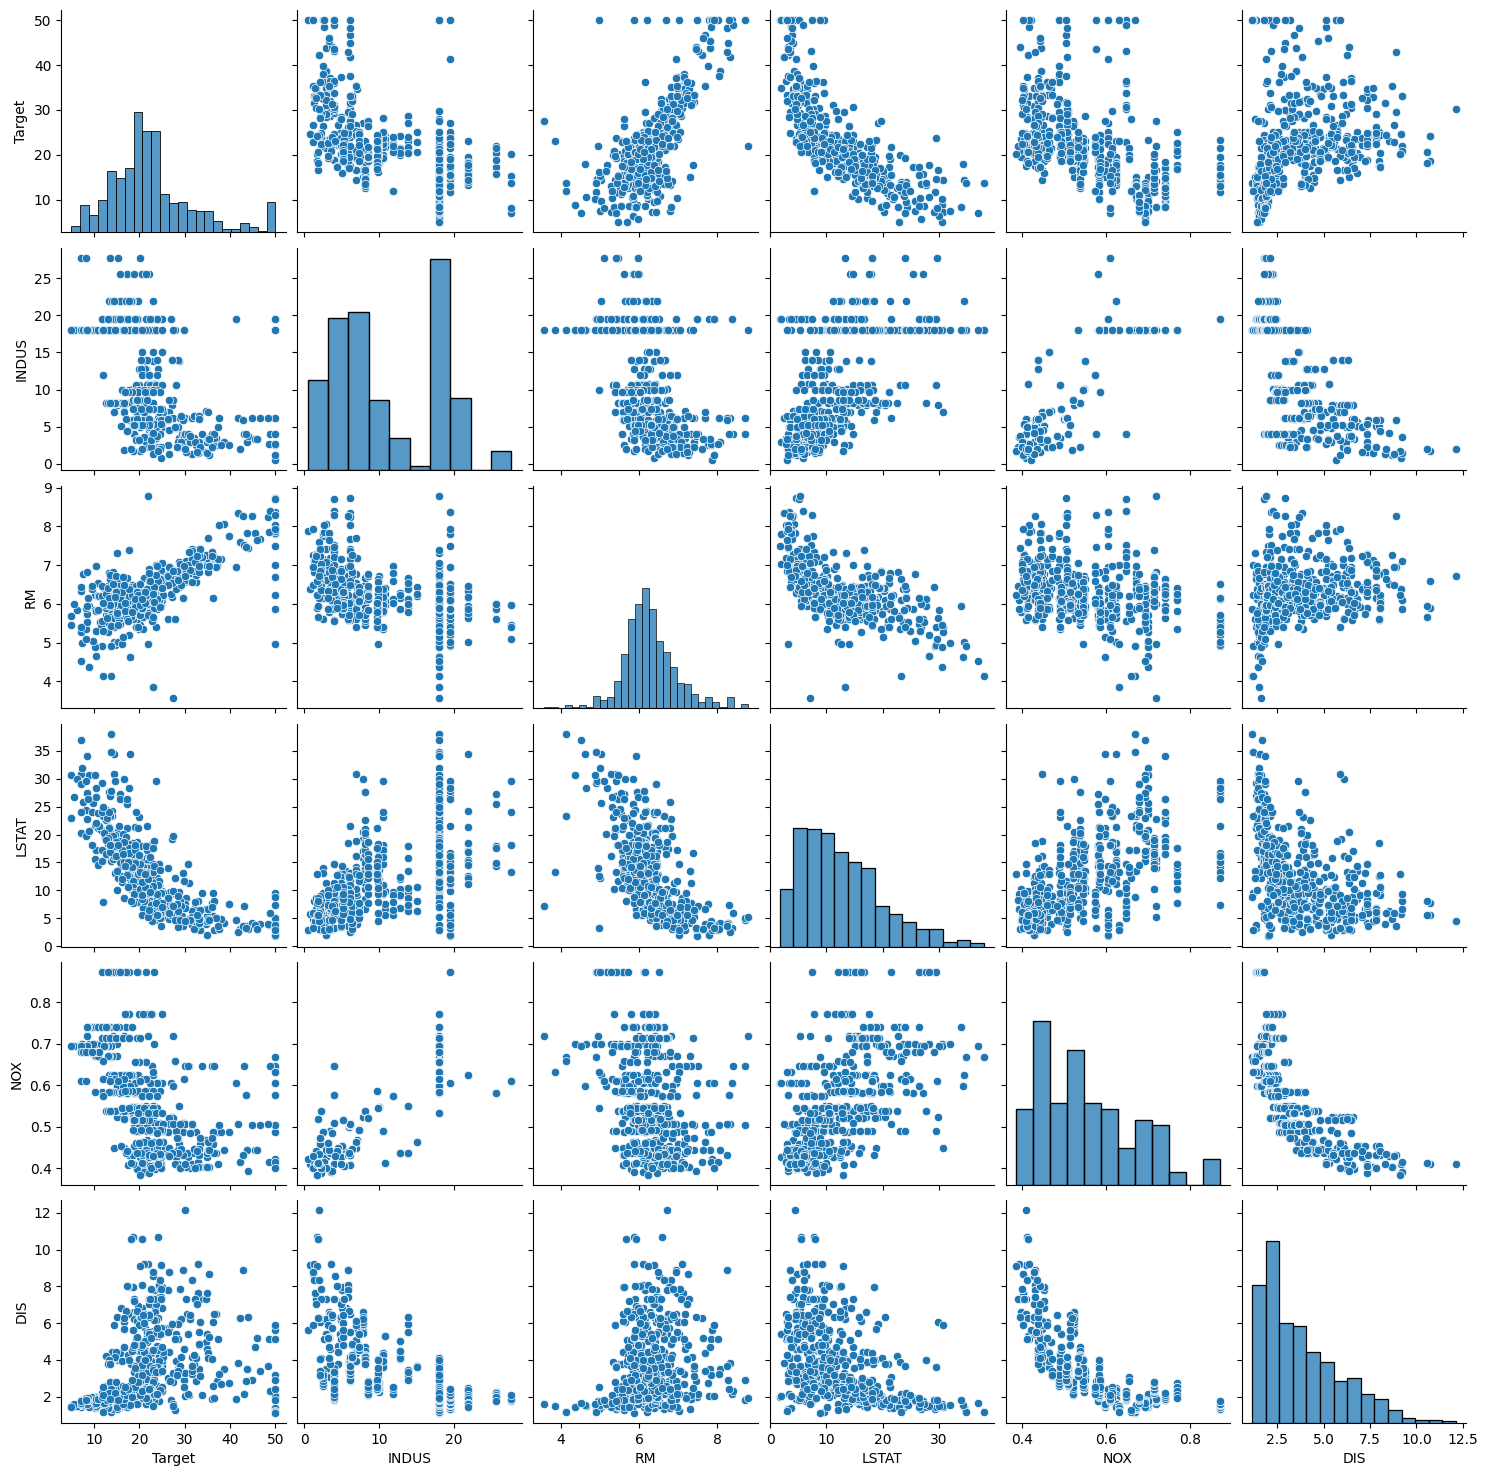

In [7]:
cols = ['Target', 'INDUS', 'RM', 'LSTAT', 'NOX', 'DIS']

sns.pairplot(df[cols])
plt.show()

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
data = torch.from_numpy(df[cols].values).float()
data.shape

torch.Size([506, 6])

In [11]:
y = data[:, :1]
x = data[:, 1:]
print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [12]:
n_epochs = 2000
learning_rate = 1e-3
print_interval = 100

In [13]:
model = nn.Linear(x.size(-1), y.size(-1))
print(model)

Linear(in_features=5, out_features=1, bias=True)


In [14]:
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [15]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0:
        print('Epochh %d: loss=%.4e'%(i+1, loss))

Epochh 100: loss=4.2864e+01
Epochh 200: loss=3.6709e+01
Epochh 300: loss=3.3321e+01
Epochh 400: loss=3.1411e+01
Epochh 500: loss=3.0335e+01
Epochh 600: loss=2.9728e+01
Epochh 700: loss=2.9385e+01
Epochh 800: loss=2.9192e+01
Epochh 900: loss=2.9083e+01
Epochh 1000: loss=2.9021e+01
Epochh 1100: loss=2.8986e+01
Epochh 1200: loss=2.8966e+01
Epochh 1300: loss=2.8954e+01
Epochh 1400: loss=2.8948e+01
Epochh 1500: loss=2.8943e+01
Epochh 1600: loss=2.8941e+01
Epochh 1700: loss=2.8939e+01
Epochh 1800: loss=2.8938e+01
Epochh 1900: loss=2.8937e+01
Epochh 2000: loss=2.8936e+01


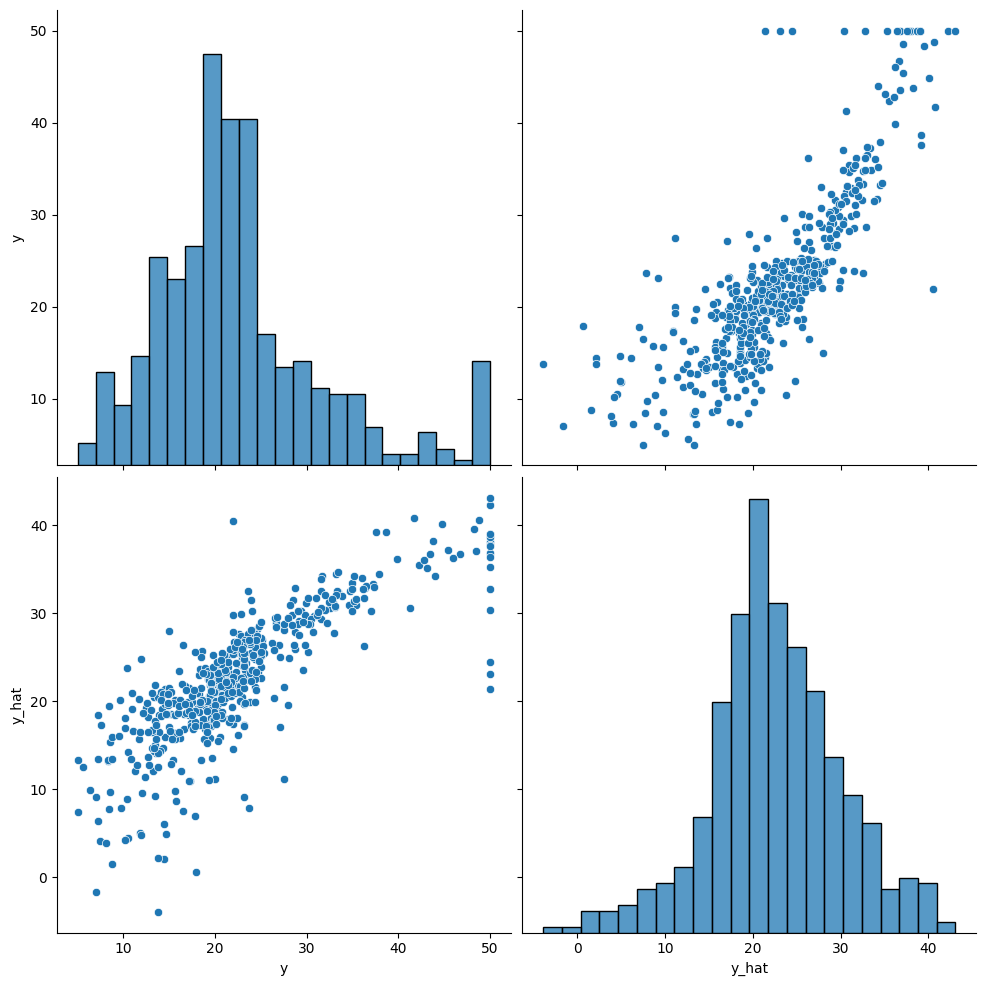

In [16]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach_().numpy(), columns = ['y', 'y_hat'])

sns.pairplot(df, height=5)
plt.show()